In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\nisha\Downloads\RNN Dataset\GOOG.csv")  # Adjust the file path
print(data.head())

# Step 2: Select the 'close' prices and normalize
prices = data['close'].values.reshape(-1, 1)  # Use 'close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)


  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  


In [9]:

# Step 3: Create sequences
def create_sequences(data, time_steps=20):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 20  # Sequence length
X, y = create_sequences(prices_scaled, time_steps)

# Reshape X for RNN input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [10]:
# Step 4: Define the RNN model
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(time_steps, 1)))
model.add(Dropout(0.2))  # Add dropout to reduce overfitting
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')  # Use MAE for regression tasks





In [11]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Step 6: Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

# True prices for comparison
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae = mean_absolute_error(true_prices, predicted_prices)
mse = mean_squared_error(true_prices, predicted_prices)
rmse = np.sqrt(mse)

# Directional accuracy (percentage of correct direction predictions)
true_directions = np.sign(np.diff(true_prices.flatten()))
predicted_directions = np.sign(np.diff(predicted_prices.flatten()))
directional_accuracy = np.mean(true_directions == predicted_directions)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1122 - val_loss: 0.0531
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0711 - val_loss: 0.0432
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0667 - val_loss: 0.0357
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 - val_loss: 0.0312
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0483 - val_loss: 0.0351
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0566 - val_loss: 0.0270
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0482 - val_loss: 0.0275
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397 - val_loss: 0.0267
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0478 - val_loss: 0.0236
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0426 - val_loss: 0.0198
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0381 - val_loss: 0.0231
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399 - val_lo

In [12]:
print(f"Test Loss (MAE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")

Test Loss (MAE): 0.020342303439974785
Mean Absolute Error (MAE): 37.701202011928764
Mean Squared Error (MSE): 2575.6234265009202
Root Mean Squared Error (RMSE): 50.75060025754296
Directional Accuracy: 98.38%


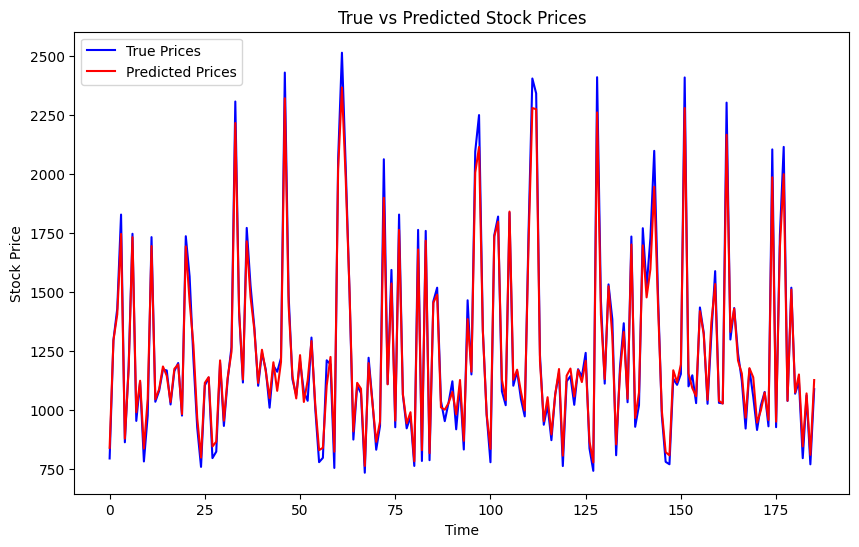

In [13]:
# Step 7: Plot true vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(true_prices, label='True Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()